<a href="https://colab.research.google.com/github/MatiasRoman96/PDI/blob/main/Segmentacion%20por%20color/%20003_Segmentacion_por_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 3: Segmentación por Color

Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.
b) Calcular y mostrar el histograma de la imagen en escala de grises.
c)Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.
d) Dibujar los bordes del objeto segmentado en color rojo.

In [1]:
#instalar y cargar librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

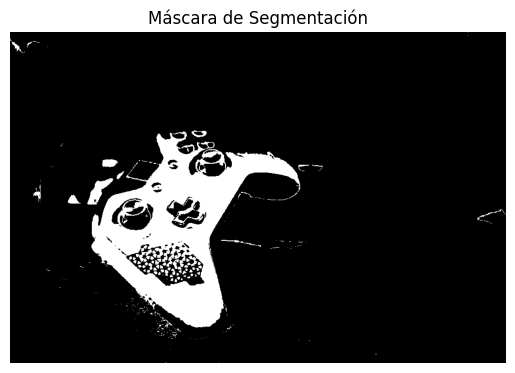

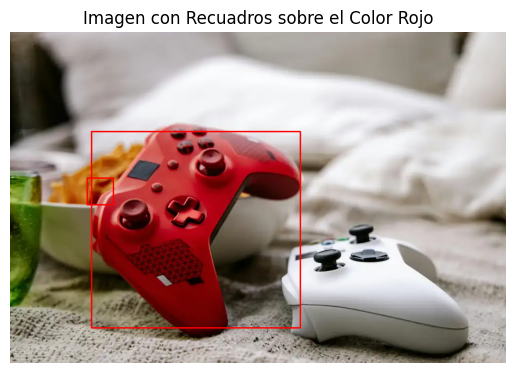

In [2]:
# Cargar la imagen desde la ruta
img = cv2.imread('/content/joy.webp')

# Convertir la imagen a RGB para visualizar correctamente
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definir el rango de color rojo en el espacio BGR (ajustar estos valores según sea necesario)
lower_red = np.array([0, 0, 90])   # Poco azul, poco verde, rojo fuerte
upper_red = np.array([80, 80, 255]) # Permitimos algo de azul y verde, pero no mucho


# Crear la máscara
mask = cv2.inRange(img, lower_red, upper_red)

# Encontrar los contornos en la máscara
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar la imagen original para dibujar el rectángulo
img_with_rectangles = img.copy()

# Iterar sobre los contornos y dibujar los rectángulos
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filtrar por tamaño del área del contorno (ajustar según sea necesario)
        # Obtener el rectángulo delimitador
        x, y, w, h = cv2.boundingRect(contour)
        # Dibujar el rectángulo en la imagen
        cv2.rectangle(img_with_rectangles, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Rojo con grosor 2

# Convertir la imagen a RGB para mostrarla correctamente
img_with_rectangles_rgb = cv2.cvtColor(img_with_rectangles, cv2.COLOR_BGR2RGB)

# Mostrar la máscara para inspeccionar
plt.imshow(mask, cmap='gray')
plt.title('Máscara de Segmentación')
plt.axis('off')
plt.show()

# Mostrar la imagen con los recuadros
plt.imshow(img_with_rectangles_rgb)
plt.title('Imagen con Recuadros sobre el Color Rojo')
plt.axis('off')
plt.show()

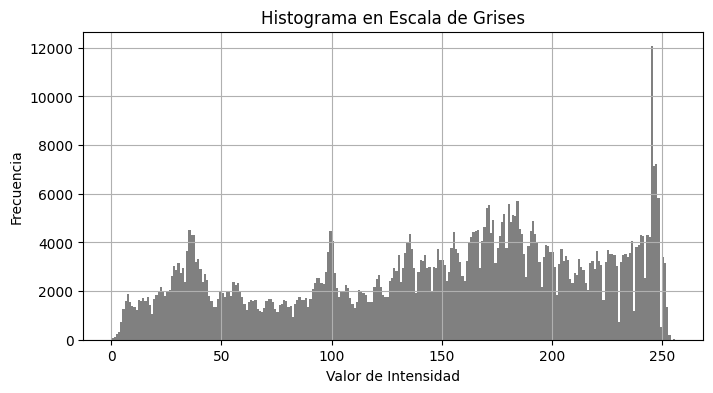

Coordenadas de los rectángulos encontrados:
Rectángulo: x=159, y=301, ancho=54, alto=55
Rectángulo: x=168, y=205, ancho=431, alto=405


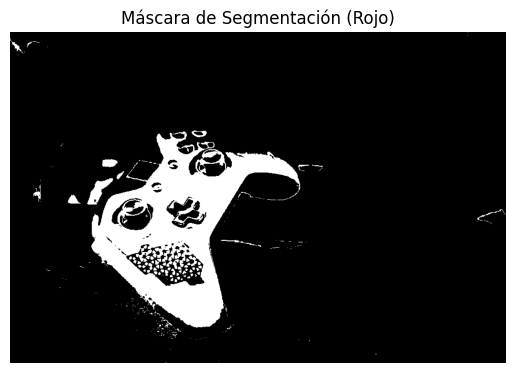

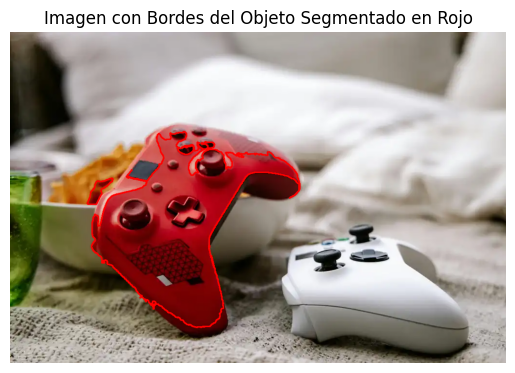

In [3]:
# === Cargar la imagen ===
img = cv2.imread('/content/joy.webp')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === a) Segmentación por color (Rojo en BGR) ===
lower_red = np.array([0, 0, 90])
upper_red = np.array([80, 80, 255])
mask = cv2.inRange(img, lower_red, upper_red)

# === b) Histograma en escala de grises ===
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 4))
plt.hist(gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histograma en Escala de Grises')
plt.xlabel('Valor de Intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# === c) Encontrar coordenadas de objetos segmentados ===
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_rectangles = img.copy()

print("Coordenadas de los rectángulos encontrados:")

for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filtrar contornos pequeños
        x, y, w, h = cv2.boundingRect(contour)
        print(f"Rectángulo: x={x}, y={y}, ancho={w}, alto={h}")
        # d) Dibujar bordes en rojo
        cv2.drawContours(img_with_rectangles, [contour], -1, (0, 0, 255), 2)

# === Mostrar la máscara ===
plt.imshow(mask, cmap='gray')
plt.title('Máscara de Segmentación (Rojo)')
plt.axis('off')
plt.show()

# === Mostrar la imagen con bordes rojos ===
img_result_rgb = cv2.cvtColor(img_with_rectangles, cv2.COLOR_BGR2RGB)
plt.imshow(img_result_rgb)
plt.title('Imagen con Bordes del Objeto Segmentado en Rojo')
plt.axis('off')
plt.show()